# Lab 10

## TODO:

- [] Decide whether you will be using a computer vision data set in this and next lab. If so, either pick one of your choosing (but not benchmark data sets like MNIST or FASNION MNIST), or use a simple smiley face data set provided on Canvas

## Imports 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import os
import random

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import SGDClassifier, LogisticRegression
from scipy.stats import randint
from sklearn.preprocessing import MinMaxScaler

In [2]:
import tensorflow as tf
from tensorflow import keras

## Data setup

In [3]:
np.random.seed(0)
df3 = pd.read_csv("Data/data3.csv")
df3

,failures,higher,studytime,Medu,Fedu,Dalc,age,reason_reputation,school,address,internet,G3
0,0,1,2,4,4,1,18,0,0,0,0,6
1,0,1,2,1,1,1,17,0,0,0,1,6
2,3,1,2,1,1,2,15,0,0,0,1,10
3,0,1,3,4,2,1,15,0,0,0,1,15
4,0,1,2,3,3,1,16,0,0,0,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...
1039,1,1,3,2,3,1,19,0,1,1,1,10
1040,0,1,2,3,1,1,18,0,1,0,1,16
1041,0,1,2,1,1,1,18,0,1,0,0,9
1042,0,1,1,3,1,3,17,0,1,0,1,10


In [4]:
X = df3.copy()
y = X.pop("G3") # y becomes the G3 column and deletes it from df3_copy
y_binary = [0 if y_i > np.mean(y) else 1 for y_i in y] #making the target class into binary (over/under average score)

# display(X)
# print(y_binary)
X

,failures,higher,studytime,Medu,Fedu,Dalc,age,reason_reputation,school,address,internet
0,0,1,2,4,4,1,18,0,0,0,0
1,0,1,2,1,1,1,17,0,0,0,1
2,3,1,2,1,1,2,15,0,0,0,1
3,0,1,3,4,2,1,15,0,0,0,1
4,0,1,2,3,3,1,16,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1039,1,1,3,2,3,1,19,0,1,1,1
1040,0,1,2,3,1,1,18,0,1,0,1
1041,0,1,2,1,1,1,18,0,1,0,0
1042,0,1,1,3,1,3,17,0,1,0,1


In [5]:
#scale
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Keras & Smile Dataset

In [6]:
smiley_X, smiley_y = np.load("./Data/smiley_X.npy"), np.load("./Data/smiley_y.npy")
X_train, X_test, y_train, y_test = train_test_split(smiley_X, smiley_y, test_size=1/3, stratify=smiley_y, random_state=42,)

1.0


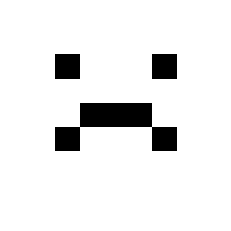

In [7]:
i = random.randint(0,95)
print(y_train[i])
plt.imshow(X_train[i], cmap="binary")
plt.axis('off')
plt.show()

In [43]:
table = pd.DataFrame()

2/2 [==============================] - 0s 3ms/step - loss: 0.0121 - accuracy: 1.0000 - true_positives_15: 24.0000 - true_negatives_15: 24.0000 - false_positives_15: 0.0000e+00 - false_negatives_15: 0.0000e+00 - precision_11: 1.0000 - recall_11: 1.0000 - specificity_at_sensitivity_7: 1.0000 - auc_6: 1.0000


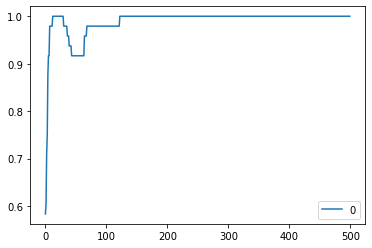

In [44]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[9, 9]),
    keras.layers.Dense(25, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])

model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy",
                       tf.keras.metrics.TruePositives(),
                       tf.keras.metrics.TrueNegatives(),
                       tf.keras.metrics.FalsePositives(),
                       tf.keras.metrics.FalseNegatives(), 
                       tf.keras.metrics.Precision(),
                       tf.keras.metrics.Recall(),
                       tf.keras.metrics.SpecificityAtSensitivity(0.5),
                       tf.keras.metrics.AUC()])

history = model.fit(X_train, y_train, validation_split=0.5, epochs=500, verbose=0,)
pd.DataFrame(history.history["val_accuracy"]).plot()

loss, accuracy, TP, TN, FP, FN, Precision, Recall, SpecificityAtSensitivity, area_under = model.evaluate(X_test, y_test)


data = pd.DataFrame([["TF", 2, "Adam", loss, accuracy, TP, TN, FP, FN, Precision, Recall, SpecificityAtSensitivity, area_under, 0.5]], 
                    columns=["Model", "Layers", "LossFn", "Loss", "Accuracy","TP", "TN", "FP", "FN", "Precision", "Recall", "SpecificityAtSensitivity", "AUC", "split"])
table = pd.concat([table, data], ignore_index=True)

2/2 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 1.0000 - true_positives_16: 24.0000 - true_negatives_16: 24.0000 - false_positives_16: 0.0000e+00 - false_negatives_16: 0.0000e+00 - precision_12: 1.0000 - recall_12: 1.0000 - specificity_at_sensitivity_8: 1.0000 - auc_7: 1.0000


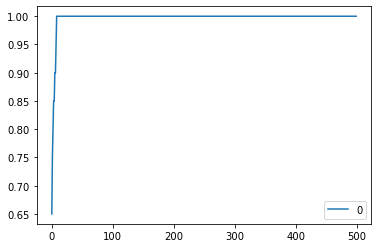

In [45]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[9, 9]),
    keras.layers.Dense(25, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])

model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy",
                       tf.keras.metrics.TruePositives(),
                       tf.keras.metrics.TrueNegatives(),
                       tf.keras.metrics.FalsePositives(),
                       tf.keras.metrics.FalseNegatives(), 
                       tf.keras.metrics.Precision(),
                       tf.keras.metrics.Recall(),
                       tf.keras.metrics.SpecificityAtSensitivity(0.5),
                       tf.keras.metrics.AUC()])

history = model.fit(X_train, y_train, validation_split=0.2, epochs=500, verbose=0,)
pd.DataFrame(history.history["val_accuracy"]).plot()

loss, accuracy, TP, TN, FP, FN, Precision, Recall, SpecificityAtSensitivity, area_under = model.evaluate(X_test, y_test)


data = pd.DataFrame([["TF", 2, "Adam", loss, accuracy, TP, TN, FP, FN, Precision, Recall, SpecificityAtSensitivity, area_under, 0.2]], 
                    columns=["Model", "Layers", "LossFn", "Loss", "Accuracy","TP", "TN", "FP", "FN", "Precision", "Recall", "SpecificityAtSensitivity", "AUC", "split"])
table = pd.concat([table, data], ignore_index=True)

2/2 [==============================] - 0s 3ms/step - loss: 0.1009 - accuracy: 0.9583 - true_positives_17: 23.0000 - true_negatives_17: 23.0000 - false_positives_17: 1.0000 - false_negatives_17: 1.0000 - precision_13: 0.9583 - recall_13: 0.9583 - specificity_at_sensitivity_9: 1.0000 - auc_8: 0.9983


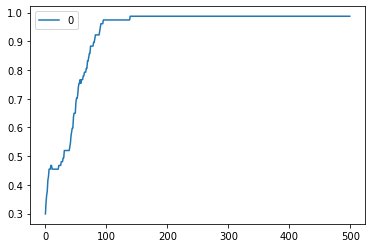

In [46]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[9, 9]),
    keras.layers.Dense(25, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])

model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy",
                       tf.keras.metrics.TruePositives(),
                       tf.keras.metrics.TrueNegatives(),
                       tf.keras.metrics.FalsePositives(),
                       tf.keras.metrics.FalseNegatives(), 
                       tf.keras.metrics.Precision(),
                       tf.keras.metrics.Recall(),
                       tf.keras.metrics.SpecificityAtSensitivity(0.5),
                       tf.keras.metrics.AUC()])

history = model.fit(X_train, y_train, validation_split=0.8, epochs=500, verbose=0,)
pd.DataFrame(history.history["val_accuracy"]).plot()

loss, accuracy, TP, TN, FP, FN, Precision, Recall, SpecificityAtSensitivity, area_under = model.evaluate(X_test, y_test)


data = pd.DataFrame([["TF", 2, "Adam", loss, accuracy, TP, TN, FP, FN, Precision, Recall, SpecificityAtSensitivity, area_under, 0.8]], 
                    columns=["Model", "Layers", "LossFn", "Loss", "Accuracy","TP", "TN", "FP", "FN", "Precision", "Recall", "SpecificityAtSensitivity", "AUC", "split"])
table = pd.concat([table, data], ignore_index=True)

In [47]:
table

,Model,Layers,LossFn,Loss,Accuracy,TP,TN,FP,FN,Precision,Recall,SpecificityAtSensitivity,AUC,split
0,TF,2,Adam,0.012068,1.000000,24.0,24.0,0.0,0.0,1.000000,1.000000,1.0,1.000000,0.5
1,TF,2,Adam,0.001169,1.000000,24.0,24.0,0.0,0.0,1.000000,1.000000,1.0,1.000000,0.2
2,TF,2,Adam,0.100932,0.958333,23.0,23.0,1.0,1.0,0.958333,0.958333,1.0,0.998264,0.8
